<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:120%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">PCA and LDA Implementation
    
</h2>
</div>
    
</center>

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:100%;
           letter-spacing:0.5px">
​
<h3 style="padding: 10px;
              color:black;"> Breast Cancer Wisconsin (Diagnostic) Data Set
 
    
</h3>
</div>
    
</center>


<center>
<img src="https://www.uicc.org/sites/main/files/styles/uicc_news_main_image/public/thumbnails/image/BCAM2016_FA.jpg?itok=zimiEGKS", width=800>
</center>

Breast cancer is the most common cancer in women, accounting for **1 in 4 cancers** diagnosed in the U.S. and causing over 40,000 deaths each year. It is also the second leading cause of cancer death in women, after lung cancer. Early detection of breast cancer is key and can help improve the chances of survival. Women should be sure to get regular mammograms and self-exams to detect any changes in their breasts.

In 2020, an estimated **276,480 new cases of invasive breast cancer** were diagnosed in women in the United States along with 48,530 new cases of non-invasive (in situ) breast cancer. It is estimated that about 42,170 women will die from this disease in 2020. Additionally, breast cancer accounts for **15% of all cancer deaths** in women. Although it is most common in women, men can also get breast cancer. In 2020, an estimated 2,620 new cases of invasive breast cancer were **diagnosed in men** in the United States, along with 500 new cases of non-invasive (in situ) breast cancer. An estimated 520 men died from this disease.

## Problem Statement

In this tutorial, based on the data we are going to find out if the cancer is **benign** or **malignant**. We'd use a technique called **Dimensionality Reduction** which would help a ton with our model building and getting a high accuracy. 

> **QUESTION**: Ramakant Hospital. offers medical facilities to thousands of patients all over India. As the lead data scientist at Ramakant Hospital, **you're tasked with creating an automated system to detect if the cancer is malign or benignant**, using information such as their mean radius, mean compactness, worst area etc. 
>
> Classification from your system will be used to determine if the patient should be operated or not. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
>
> Dataset source: [link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Importing Libraries
    
</h2>
</div>

We would use python libraries such as **Numpy**, **Pandas** and **Plotly** so let's start off by installing and import the required libraries into our code

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

`sklearn` provides this dataset for us to work with so we are going to be using the same library for importing our dataset and loading into a dataframe with the help of `pandas` library

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Loading the data
    
</h2>
</div>

To begin, let's download the data using the `load_breast_cancer()` function from `sklearn.datasets`.

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Exploratory Data Analysis aka EDA
    
</h2>
</div>

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "target" and other columns. We'll use libraries Matplotlib, Seaborn and Plotly for visualization. You can follow this [tutorial](https://www.kaggle.com/code/bhatnagardaksh/visualization-guide-for-beginners) to learn how to use these libraries where I dive a little deeper and show various ways to use these libraries.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [5]:
#Value counts of unique data types in our dataframe
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

Looks like all the data is numerical.`float` and `int`. None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [6]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean_texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean_perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean_area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean_smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean_compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean_concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean_concave_points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean_symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean_fractal_dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## What is the distribution of the Target Values?

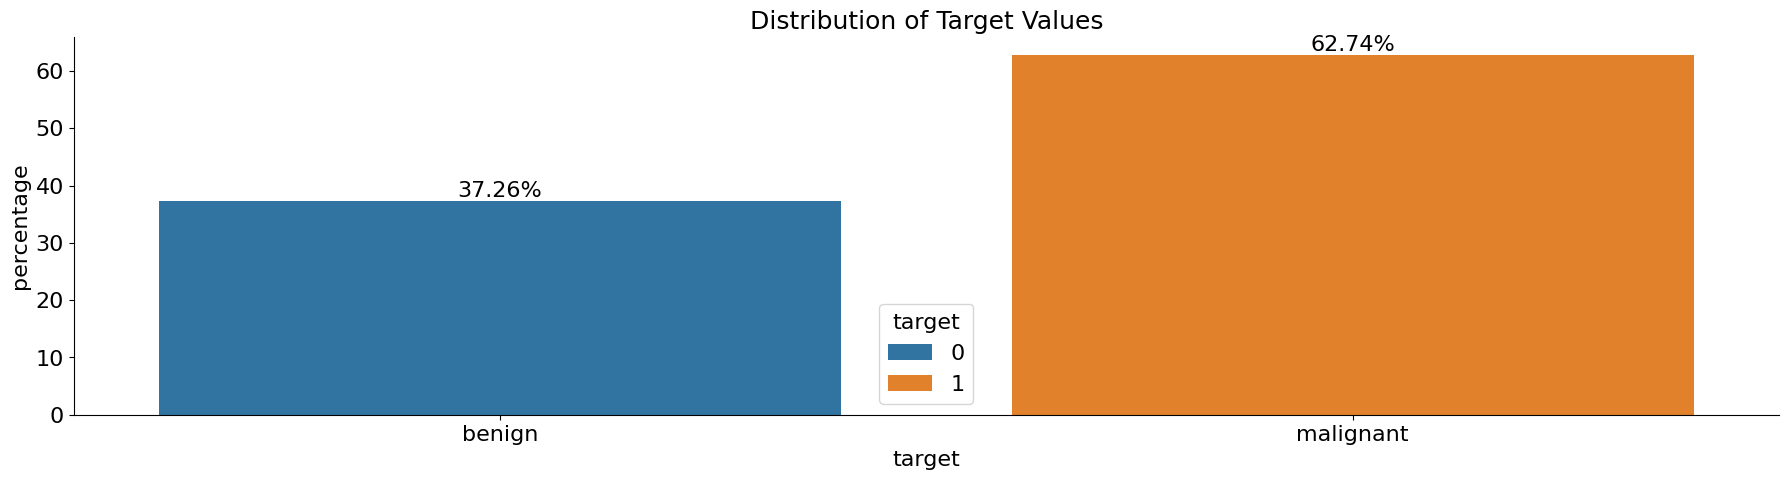

In [7]:
value_counts_df = (round(df.target.value_counts(normalize=True)*100,2)).reset_index()
value_counts_df.columns = ['target', 'percentage']
ax = sns.barplot(x=value_counts_df['target'], y=value_counts_df['percentage'], hue=value_counts_df['target'], dodge=False)
ax.bar_label(ax.containers[0], fmt="%.2f%%")
ax.bar_label(ax.containers[1],fmt="%.2f%%") 
plt.xticks(ticks=[0,1], labels=['benign', 'malignant'])
plt.title('Distribution of Target Values', fontsize=18)
plt.show()

## Which columns are least related to our target class?

To find this out we can use ANOVA. ANOVA is a statistical test used to determine whether there are significant differences between the means of two or more groups. In this case, you can use ANOVA to compare the means of the numerical columns for the two groups of the binary target variable (0 and 1).

In [8]:
num_cols = list(df.select_dtypes('float64').columns)
unrelated_num_cols = []
categorical_col = 'target'

for i in num_cols:
    # Perform Kruskal-Wallis test
    grouped_data = [df[i][df[categorical_col] == category] for category in df[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    # Set the significance level (alpha)
    alpha = 0.05

    # Print the results with appropriate text color
    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value:.2e}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value:.2e}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
        unrelated_num_cols.append(i)

ANOVA statistic: 646.98
p-value: 8.47e-96
Reject the null hypothesis: There is a significant relationship between mean_radius and target

ANOVA statistic: 118.1
p-value: 4.06e-25
Reject the null hypothesis: There is a significant relationship between mean_texture and target

ANOVA statistic: 697.24
p-value: 8.44e-101
Reject the null hypothesis: There is a significant relationship between mean_perimeter and target

ANOVA statistic: 573.06
p-value: 4.73e-88
Reject the null hypothesis: There is a significant relationship between mean_area and target

ANOVA statistic: 83.65
p-value: 1.05e-18
Reject the null hypothesis: There is a significant relationship between mean_smoothness and target

ANOVA statistic: 313.23
p-value: 3.94e-56
Reject the null hypothesis: There is a significant relationship between mean_compactness and target

ANOVA statistic: 533.79
p-value: 9.97e-84
Reject the null hypothesis: There is a significant relationship between mean_concavity and target

ANOVA statistic: 861.

In [9]:
print(f'The columns that failed the ANOVA test are {unrelated_num_cols}. These columns don\'t help in making predictions.')

The columns that failed the ANOVA test are ['mean_fractal_dimension', 'texture_error', 'smoothness_error', 'symmetry_error', 'fractal_dimension_error']. These columns don't help in making predictions.


We can drop these columns from our data and then we can use PCA to find which column explain the most variance in our data. By doing this, we will be helping the PCA algorithm computationally.

In [10]:
# Creating a sqlite3 database to run some SQL Queries 
conn = sqlite3.connect('database.db' )

# Write the DataFrame to a table in the database
df.to_sql('data', conn, if_exists='replace', index=False)

## What is the spread of Mean Texture??

The texture is an important feature for image analysis techniques that are used to classify tumors and evaluate the presence of cancer. Texture analysis can be used to detect regions of high and low density in an image, which can help to identify the presence and type of tumor.

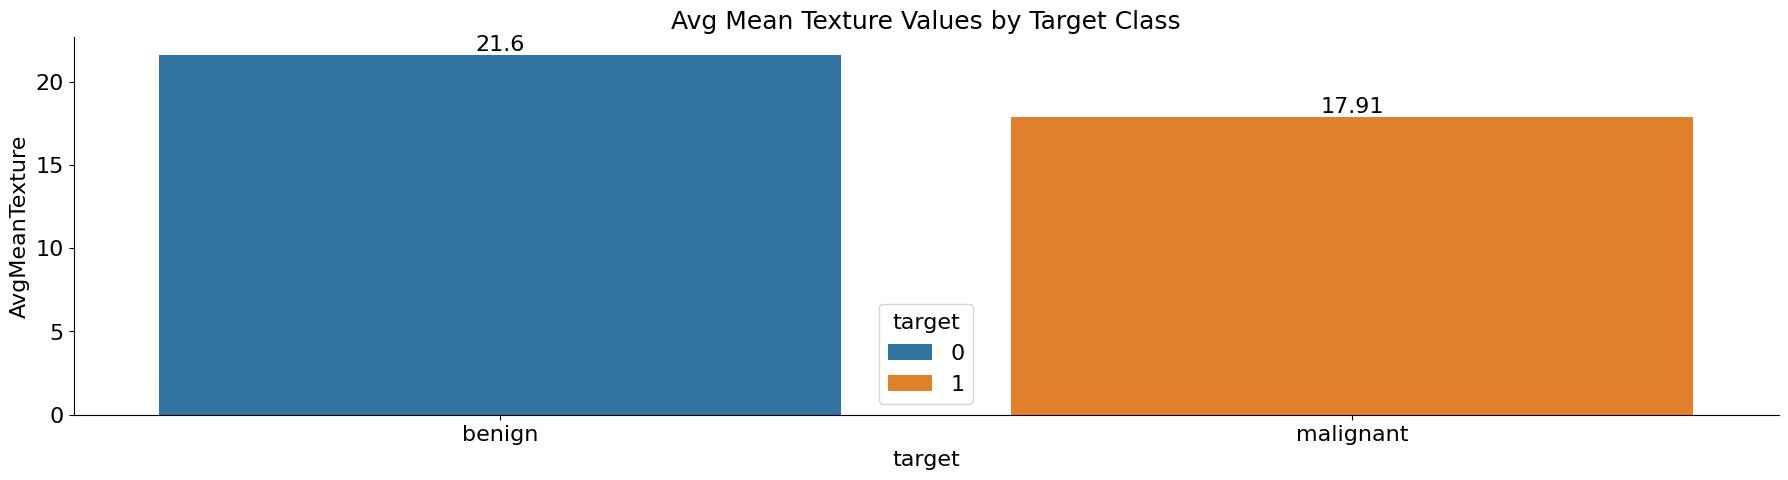

In [11]:
query = '''

select target,round(avg(mean_texture),2) as AvgMeanTexture 
from data group by target
'''
temp = pd.read_sql(query, conn)
ax = sns.barplot(x=temp['target'], y=temp['AvgMeanTexture'], hue=temp['target'], dodge=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
plt.xticks(ticks=[0,1], labels=['benign', 'malignant'])
plt.title('Avg Mean Texture Values by Target Class', fontsize=18)
plt.show()

## What is the spread of Mean Compactness??

Compactness is a measure of how densely packed the cells of a tumor are. It is an important factor in determining the prognosis of a cancer patient. Compactness is used to classify tumors into different types, such as solid or non-solid. Solid tumors tend to have higher compactness and can be more difficult to treat. Non-solid tumors tend to be less dense and can often be treated more easily.

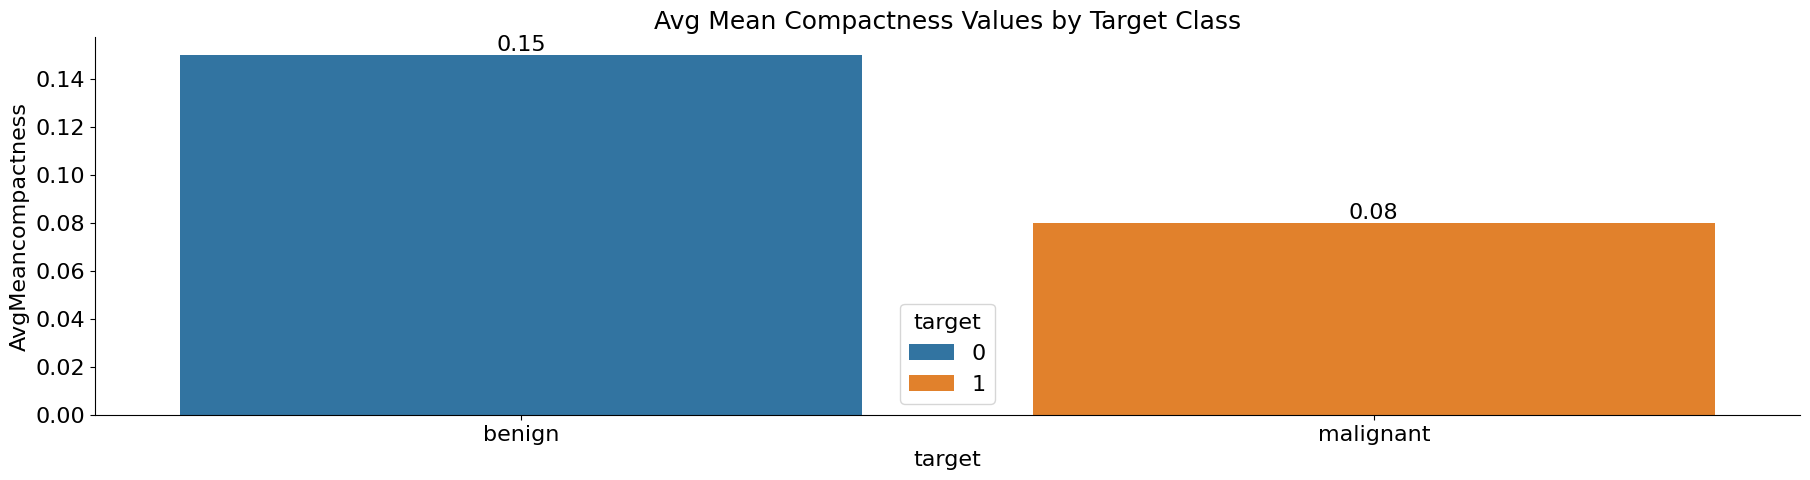

In [12]:
query = '''

select target,round(avg(mean_compactness),2) as AvgMeancompactness 
from data group by target
'''
temp = pd.read_sql(query, conn)
ax = sns.barplot(x=temp['target'], y=temp['AvgMeancompactness'], hue=temp['target'], dodge=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]) 
plt.xticks(ticks=[0,1], labels=['benign', 'malignant'])
plt.title('Avg Mean Compactness Values by Target Class', fontsize=18)
plt.show()

In [13]:
query = '''

SELECT
    target, round(max(mean_compactness),3) as Max_MeanCompactness, 
    round(min(mean_compactness),3) as Min_MeanCompactness from data where target = 0
    
UNION

SELECT
    target, round(max(mean_compactness),3) as Max_MeanCompactness, 
    round(min(mean_compactness),3) as Min_MeanCompactness from data where target = 1

'''
temp = pd.read_sql(query, conn)
temp

,target,Max_MeanCompactness,Min_MeanCompactness
0,0,0.345,0.046
1,1,0.224,0.019


## What is the spread of Mean Concave Points??

Concave points refer to the indented areas that can sometimes appear on the surface of a tumor. They are seen on a mammogram or other imaging and can be an indicator of malignancy, or cancer.

In [14]:
fig = px.scatter(df,
                 x="mean_concave_points", 
                 size='mean_concave_points',
                 color="target", 
                 hover_data=["target"],
                 template="simple_white", 
                 labels={"mean_concave_points": "Mean Concave Points"},
                 title="Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
fig.show()

We can definitely go more in-depth analysis but that's beyond the scope of this notebook.


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Data Pre-processing
    
</h2>
</div>
    
**Data preprocessing** is essential in machine learning because it helps to convert raw data into a more suitable form, which can then be more effectively used by a machine learning algorithm. By preprocessing data, it can be better **organized** and **structured**, which can reduce noise, simplify features, and eliminate irrelevant and redundant features. This helps **improve** the accuracy and performance of the machine learning algorithm.
    
Now, lets start processing our data and make sure its in line with the requirements of the machine learning ecosystem.

In [15]:
#Dropping the unrelated cols we found out using ANOVA
df.drop(labels=unrelated_num_cols, axis=1, inplace=True)

In [16]:
#Columns in the dataframe after dropping columns
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'radius_error',
       'perimeter_error', 'area_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension', 'target'],
      dtype='object')

In [17]:
input_cols = list(filter(lambda x : x!='target', df.columns))
target_col =  'target'

We are now **seperating** our input and output values so that when are about to split the data, it is easier for us.

In [18]:
inputs_df = df[list(input_cols)].copy()
inputs_df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,radius_error,perimeter_error,area_error,compactness_error,concavity_error,concave_points_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.2323,1.596,21.84,0.013710,0.02153,0.01183,16.01,28.48,103.90,783.6,0.1216,0.1388,0.17000,0.10170,0.2369,0.06599
55,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.3249,2.183,23.47,0.008722,0.01349,0.00867,12.84,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036
233,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.08340,0.1448,0.5240,3.767,70.01,0.020620,0.03457,0.01091,24.47,37.38,162.70,1872.0,0.1223,0.2761,0.41460,0.15630,0.2437,0.08328
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.2744,1.787,17.67,0.048880,0.05189,0.01450,10.60,18.04,69.47,328.1,0.2006,0.3663,0.29130,0.10750,0.2848,0.13640
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.4030,3.123,41.51,0.037180,0.06165,0.01051,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.90340,0.19640,0.3245,0.11980


In [19]:
targets = df[target_col]
targets.sample(5)

540    1
338    1
537    1
425    1
469    1
Name: target, dtype: int64

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: gray;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Data Scaling
    
</h3>
</div>


Normalization and standardization are two fundamental data scaling techniques extensively employed in algorithms that necessitate scaling. Both methods can be implemented using the `scikit-learn` library's preprocessing package.

**Normalization**, also known as Min-Max scaling, transforms the data linearly to a specified range, typically between 0 and 1. It accomplishes this by subtracting the feature's minimum value and then dividing by the range (max - min). Mathematically, for a feature vector X, normalization transforms it as follows:

$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

**Standardization**, on the other hand, rescales the data to have a mean of 0 and a standard deviation of 1. It accomplishes this by subtracting the feature's mean and then dividing by the standard deviation. Mathematically, for a feature vector X, standardization transforms it as follows:

$$X_{scaled} = \frac{X - \bar{X}}{\sigma}$$

**Comparison**

The primary distinction between normalization and standardization lies in their sensitivity to outliers. Normalization is susceptible to outliers because it scales the data based on the minimum and maximum values, which can be significantly affected by outliers. Standardization, on the other hand, is less sensitive to outliers because it scales the data based on the mean and standard deviation, which are more resilient to outliers.

**Applications**

- Normalization is frequently used when the data has a well-defined range or when preserving relative distances between data points is critical. It is commonly used in image processing and neural networks.

- Standardization is preferred when the data distribution is approximately Gaussian or when the presence of outliers is a concern. It is widely used in statistical analysis and machine learning algorithms that assume normally distributed data.

Since we have a high dimensionality data, **scaling** the data will help us with the **Principal Component Analysis** which we will take a look at next.

In [20]:
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,radius_error,perimeter_error,area_error,compactness_error,concavity_error,concave_points_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,0.369034,0.273811,0.351398,0.135682,0.300625,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,0.124440,0.125660,0.081323,0.046970,0.253836,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,0.180370,0.162922,0.283955,0.096768,0.389847,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,0.126655,0.038155,0.543215,0.142955,0.353665,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,0.220563,0.163688,0.167918,0.143636,0.357075,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Principal Component Analysis (PCA)
    
</h2>
</div>
    
</center>



Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to simplify complex data while retaining essential information. It transforms a set of correlated variables into a smaller number of uncorrelated variables called principal components, effectively summarizing the data's key patterns.

PCA serves two primary purposes:

1. **Dimensionality Reduction:** PCA reduces the number of variables, simplifying data visualization and analysis. This makes it easier to identify patterns and relationships within the data.

2. **Overfitting Prevention:** By eliminating highly correlated features, PCA reduces the risk of overfitting in machine learning models. Overfitting occurs when a model becomes too closely aligned with the training data, leading to poor performance on new data.

<span style="background-color: yellow;"> PCA achieves these goals by **maximizing the variance** of the projected data on a given axis while **minimizing the reconstruction error** or residuals. It identifies principal components, directions that capture the most significant variations in the data.</span> Projecting data onto these principal components maximizes variance and minimizes reconstruction error, effectively reducing dimensionality without losing crucial information.

The below image aptly illustrates PCA's objective. The red dots represent data points, and the arrows represent principal components. Longer arrows correspond to directions with higher variance, while shorter arrows correspond to directions with lower variance. PCA projects data onto these principal components, reducing dimensionality while preserving essential information.
    
    
<center>
<img src="https://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png", width=800>
</center>
    



<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Creating Covariance Matrix and finding Eigenvalues and Eigen Vectors
    
</h3>
</div>

An **eigenvector** (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product  has the exact same direction as $v$. An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: $$A\vec{v} = \lambda*\vec{v}$$

where,

$A$ = square matrix (equal rows & columns)

$\vec{v}$ = non-zero vector

$\lambda$ = scalar value or eigenvalue

<span style="background-color: yellow;"> 
An eigenvector of a square matrix $A$ is a non-zero vector $\vec{v}$ that, when multiplied by the matrix $A$, results in a scalar multiple of itself. Basically, Eigenvectors are vectors that, when transformed by the matrix $A$, only change in magnitude, not in direction.</span>

<br></br>

**For example**, 

consider a 2D eigenvector [1, 1] and its corresponding matrix $A$. If $A$ scales the vector by a factor of 2, the transformed vector will be [2, 2]. The vector has doubled in length, but its direction remains the same – it still points along a 45-degree angle from the $x$-axis.

---

**Calculation of Eigenvalues and Eigenvectors**

Let's see how we calculate the eigenvalues and the eigenvectors. To find the eigenvectors of the matrix $A$, we first need to find the eigenvalues. The eigenvalues are the values $\lambda$ that satisfy the equation:

$$det(A - \lambda*I) = 0$$

- The equation $det(A - \lambda*I) = 0$ is the characteristic equation of a square matrix $A$, where $\lambda$ represents the eigenvalues of the matrix and $I$ is the identity matrix. We try to satisfy this equation to find the eigenvalues of $A$, which are crucial for understanding the matrix's properties and behavior.

- The reason we set the determinant of $(A - \lambda*I)$ to zero is that the determinant of a matrix is zero if and only if the matrix is singular, meaning it has no inverse. In the context of eigenvectors, this means that there exists a non-zero vector $\vec{v}$ such that $A\vec{v} = \lambda*\vec{v}$. This equation represents the defining property of eigenvectors: when multiplied by the matrix $A$, they only change in magnitude, not in direction.

- By solving the characteristic equation, we find the values of $\lambda$ that make the matrix $(A - \lambda*I)$ singular, and these values correspond to the eigenvalues of $A$. Once we have the eigenvalues, we can find the corresponding eigenvectors by solving the equation $A - \lambda*I = 0$ for each eigenvalue.

Consider a square matrix $A$ with 3 rows and 3 columns

$$ A = \begin{bmatrix}
3 & 1 & 4 \\
1 & 2 & 5 \\
4 & 5 & 6 \\
\end{bmatrix}$$

Here the $I$ is an identity matrix which is show below

$$ A_{I} = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}$$

So when we perform the operation $A - \lambda\space I$ we get

$$ A-\lambda I = \begin{bmatrix}
\color{red}3\color{red}-\color{red}\lambda & 1 & 4 \\
1 & \color{red}2\color{red}-\color{red}\lambda & 5 \\
4 & 5 & \color{red}6\color{red}-\color{red}\lambda \\
\end{bmatrix} = 0 $$

And when we apply [Gaussian Elimination](https://bit.ly/3RqRCdQ) on this matrix, we get


$$ B = \begin{bmatrix}
1-\lambda & 2-\lambda & 5 \\
0 & 1-\lambda & -1 \\
-3-\lambda & 2-\lambda & 1 \\
\end{bmatrix}$$

Solving for $\lambda$, we get the eigenvalues  $\lambda_{1}$ = -2,  $\lambda_{2}$ = 2, and  $\lambda_{3}$ = 11. From here on out, it becomes easy as we simply have to substitute the  $\lambda$ values in to the equation $A\vec{v} = \lambda*\vec{v}$ which will give us 

$$\vec{v_{1}} = [-1, 1, 1]$$ 
$$\space \vec{v_{2}} = [2, 1, 0]$$
$$\space \vec{v_{3}} = [1, 2, 1]$$

The above vectors are your eigenvectors

In [21]:
#Extracting input values
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)
    
#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

**Why do we calculate the covariance matrix**

- <span style="background-color: yellow;"> The covariance matrix is used to calculate eigenvectors and eigenvalues in principal component analysis (PCA) because it captures the variances and covariances between the features in a dataset.</span> PCA aims to identify the principal components, which are the directions of maximum variance in the data. These directions correspond to the eigenvectors of the covariance matrix, and the corresponding eigenvalues represent the magnitudes of variance along those directions.

- <span style="background-color: yellow;"> The covariance matrix is a square matrix where each element represents the covariance between two features.</span> The diagonal elements represent the variances of individual features, while the off-diagonal elements represent the covariances between different features.


- By calculating the eigenvectors and eigenvalues of the covariance matrix, <span style="background-color: yellow;"> PCA identifies the directions of maximum variance in the data. These directions are the principal components, and they represent the most significant patterns of variation in the dataset.</span> Projecting the data onto these principal components reduces dimensionality while preserving as much of the original information as possible.

In [22]:
print("Shape of eigenvalues:", eigen_values.shape)
print("Shape of eigenvectors:", eigen_vectors.shape)
print("Shape of covariance matrix:", covariance_matrix.shape)

Shape of eigenvalues: (25,)
Shape of eigenvectors: (25, 25)
Shape of covariance matrix: (25, 25)


In [23]:
#First Element of the Covariance Matrix
covariance_matrix[0]

array([0.027818  , 0.00785484, 0.02794603, 0.02458229, 0.00361231,
       0.01367458, 0.02108345, 0.02645754, 0.00341174, 0.01137405,
       0.01071215, 0.01042819, 0.00462112, 0.00246906, 0.0073333 ,
       0.02780391, 0.00811481, 0.02693902, 0.02196388, 0.0030081 ,
       0.0105267 , 0.01464405, 0.028038  , 0.00333488, 0.00013961])

In [24]:
#First Eigenvector
eigen_vectors[0]

array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [25]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 0.3301


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Explained Variance
    
</h3>
</div>

**Explained variance** is a measure of how much of the total variance in a dataset can be explained by a particular model. It is a measure used to evaluate how well a model fits the data. It is calculated by taking the ratio of the variance explained by the model to the total variance of the data. A higher explained variance indicates that the model is capturing more of the underlying structure of the data.

In [26]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))): 
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print(f'At {i+1} PC, Explained Variance is {round(c,2)}%')
        break

At 1 PC, Explained Variance is 59.5%
At 2 PC, Explained Variance is 74.84%
At 3 PC, Explained Variance is 82.28%
At 4 PC, Explained Variance is 87.3%
At 5 PC, Explained Variance is 90.78%


In [27]:
variance_percentage = np.around(explained_variance[-1], 2)
num_principal_components = len(explained_variance)
print(f"Explained Variance Achieved : {variance_percentage}% , PCs needed : {num_principal_components}")

Explained Variance Achieved : 90.78% , PCs needed : 5


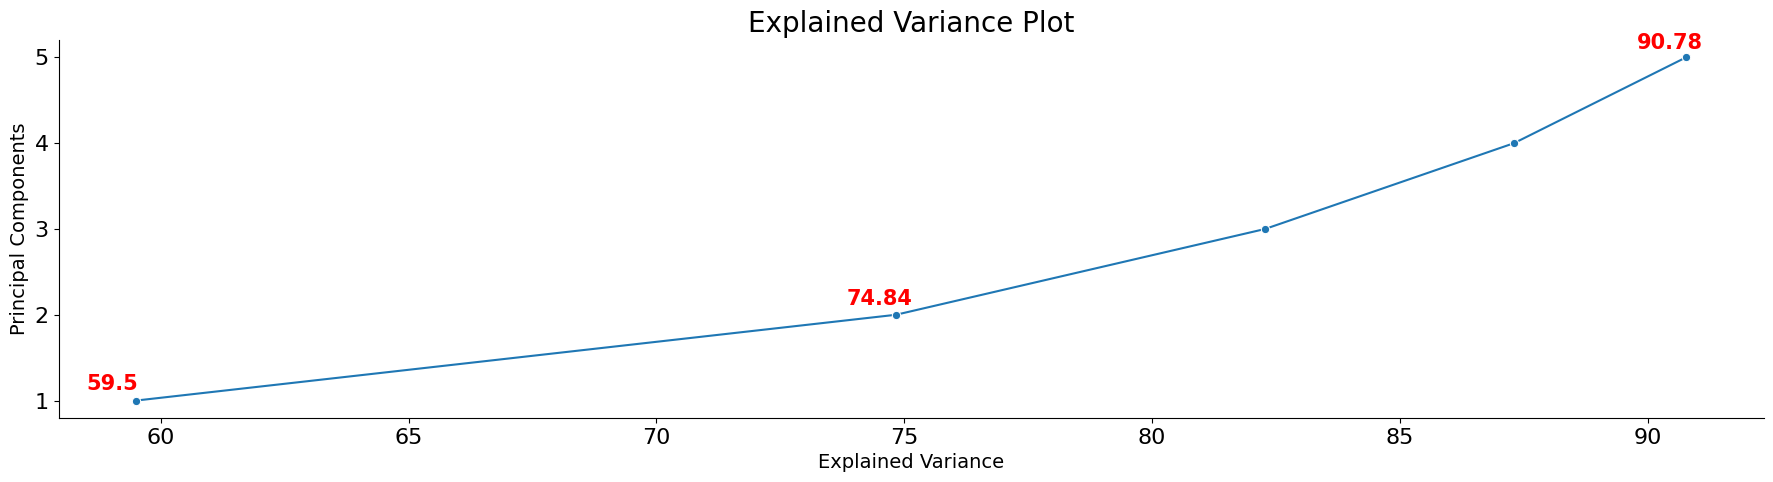

In [28]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1), marker='o')
plt.annotate(f'{round(explained_variance[0],2)}', (round(explained_variance[0],2)-1, 1.12), 
             fontsize=15, fontweight='bold', color='red')
plt.annotate(f'{round(explained_variance[1],2)}', (round(explained_variance[1],2)-1, 2.12), 
             fontsize=15, fontweight='bold', color='red')
plt.annotate(f'{round(explained_variance[4],2)}', (round(explained_variance[4],2)-1, 5.1), 
             fontsize=15, fontweight='bold', color='red')
plt.yticks(range(1,len(explained_variance)+1,1))
plt.title('Explained Variance Plot', fontsize=20)
plt.xlabel('Explained Variance', fontsize=14)
plt.ylabel('Principal Components',fontsize=14)
plt.show()

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Displaying the Linear Transformations (Before and After)
    
</h3>
</div>

Let's now transform our original data now that we have found out our principal components. The operation of transforming the original data using principal components is called **principal component projection**. It involves projecting the original data onto the principal components, which are the directions of maximum variance in the data. This projection effectively reduces the dimensionality of the data while preserving as much of the original information as possible.

In this transformation, what we do is do a dot-product between the original data and the **Principal components** we just found out.

$$ X_{new} =  X \cdot PC $$

The process involves multiplying the centered data matrix by the matrix of selected eigenvectors, resulting in a transformed data matrix with lower dimensionality. This transformed data captures the most significant variations in the original data while reducing the number of variables, making it easier to analyze and visualize.

In [29]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

def plot_vectors(vectors, colors, labels):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'], ['Vector 1', 'Vector 2'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],angles='xy', scale_units='xy', scale=1, color=colors[i],label=labels[i])

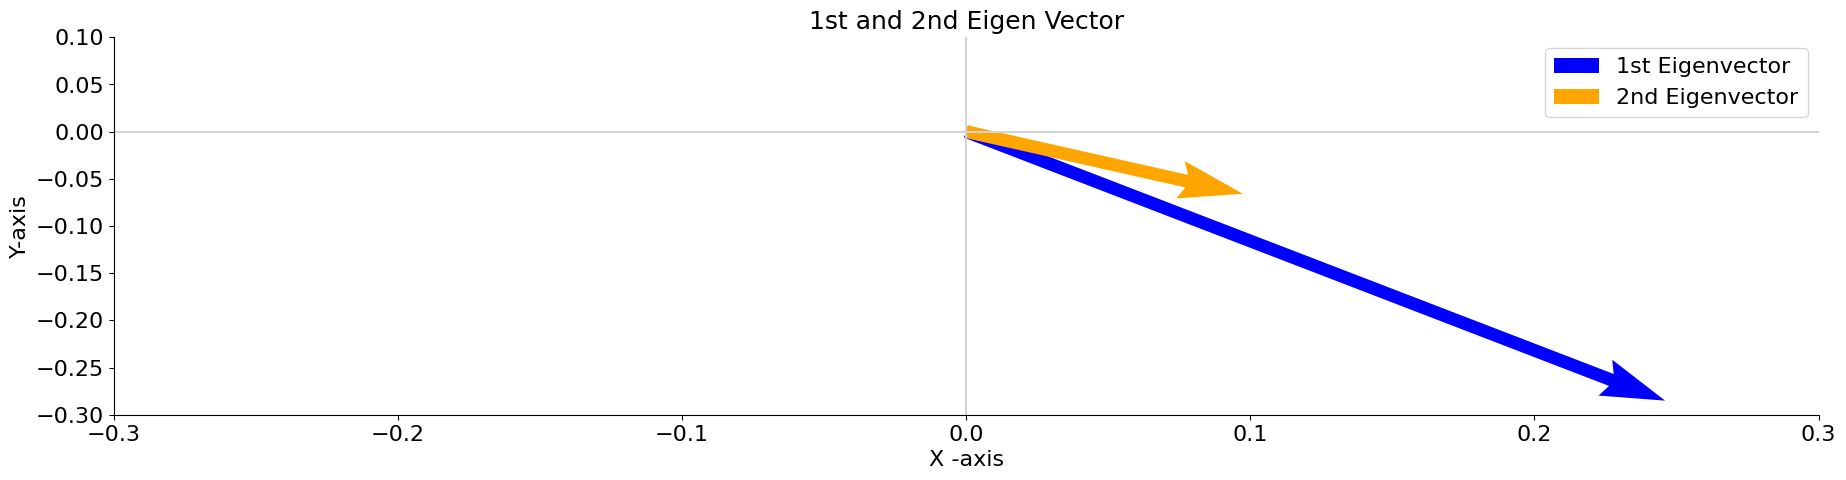

In [30]:
plot_vectors([eigen_vectors[0], eigen_vectors[1]] , ['blue', 'orange'], ['1st Eigenvector', '2nd Eigenvector'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('1st and 2nd Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.3)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()

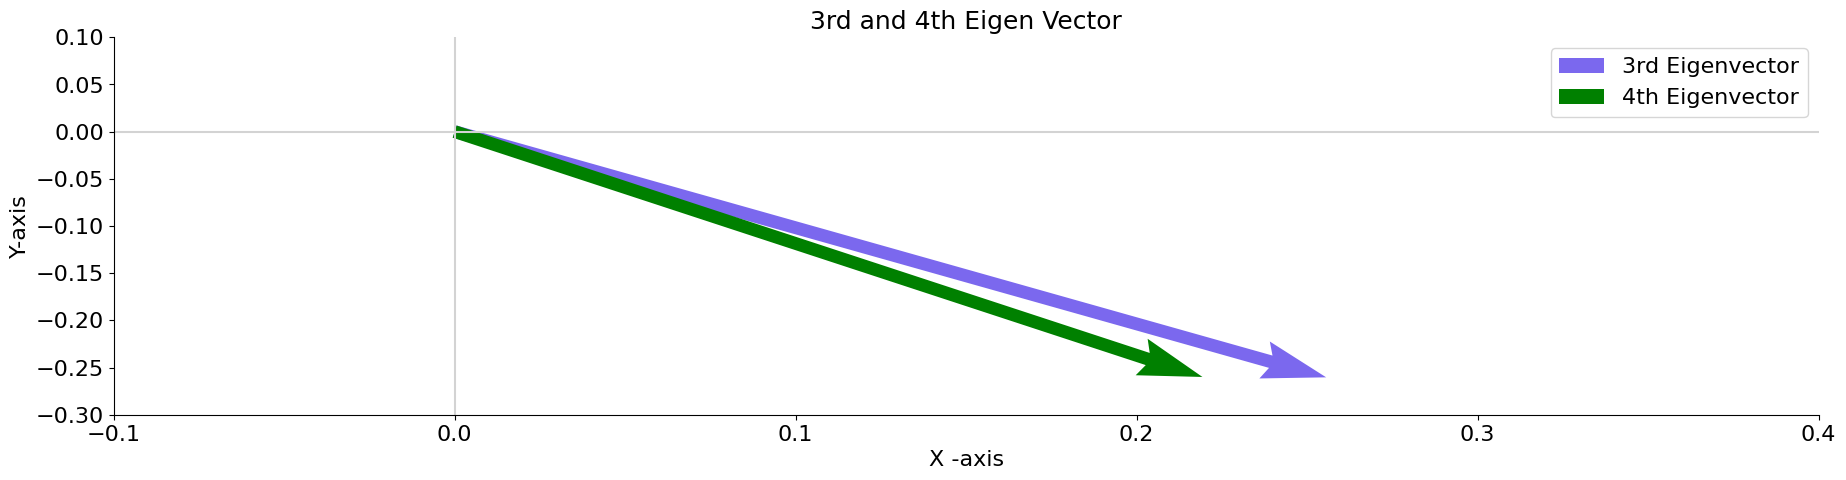

In [31]:
plot_vectors([eigen_vectors[2], eigen_vectors[3]] , ['mediumslateblue', 'green'], ['3rd Eigenvector', '4th Eigenvector'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('3rd and 4th Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.legend(['3rd Vector', '4th Vector'])
plt.ylabel('Y-axis')
plt.xlim(-0.1, 0.4)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Transforming the entire data
    
</h3>
</div>

We have chosen 5 components since they explain the 90% of the explained variance in our data. The transpose is being done to enable the `matrix multiplication`. The shape of the dataframe and the Principal Components array is different and to be able to multiply the matrices, the length of the rows of one matrix should be equal to the length of the columns of another matrix


$$ a \space @ \space b = a_{m*n} * b_{n*p}$$

where $m$, $n$ and $p$ are dimensions of the matrices $A$ and $B$

In [32]:
pc = eigen_vectors[0:len(explained_variance)]
print(f'The shape of the Principal Component Matrix is {pc.shape}')

The shape of the Principal Component Matrix is (5, 25)


In [33]:
print('The Original PC array')
pc[0]

The Original PC array


array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [34]:
print('The Transpose of PC array')
pc.T[0]

The Transpose of PC array


array([0.24595212, 0.09735703, 0.25557267, 0.21928724, 0.10784383])

In [35]:
transformed_df = np.dot(inputs_df.iloc[:,0:len(inputs_df.columns)],pc.T)
new_df = pd.DataFrame(transformed_df,columns=["PC"+str(i+1) for i in range(len(pc))])
new_df['Target'] = df['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,Target
0,0.034773,0.398491,0.686401,-1.055867,-0.138927,0
1,-0.154531,0.489669,0.468577,-0.786602,0.111376,0
2,-0.119872,0.437182,0.444838,-1.045942,0.024061,0
3,0.240011,0.060654,0.452463,-1.322787,-0.231652,0
4,-0.060162,0.451352,0.439179,-0.755014,0.015844,0


From all the **Eigen Vectors** we have thus received after the Linear Transformation, we have selected the one that have the tallest vectors which means the variance on the unit vector will be the highest.

In [36]:
new_df['Target'] = new_df['Target'].astype('int')

In [37]:
fig = px.scatter(new_df, x='PC1', y='PC2', color='Target', template="simple_white")
fig.update_layout(title='Top 2 PCs Scatterplot', title_font_size=18)
fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')

# Add annotations for quadrants
fig.add_annotation(x=-0.45, y=0.1, text='Quadrant 2', font_size=14, font_color='red')
fig.add_annotation(x=0.23, y=0.1, text='Quadrant 1', font_size=14, font_color='red')

fig.update_xaxes(title='PC1')
fig.update_yaxes(title='PC2')

fig.show()

In [38]:
# Class 0 Individuals
new_df[new_df.Target==0].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
100,-0.075702,0.167182,0.201721,-0.778757,0.010475,0
343,-0.097808,0.425346,0.375385,-1.043325,0.061520,0
236,-0.316048,0.573906,0.655091,-1.209337,0.189495,0
14,0.063776,0.178812,0.305464,-1.054985,-0.099876,0
146,0.090404,0.124083,0.262559,-0.953200,-0.148716,0


In [39]:
#Class 1 Individuals
new_df[new_df.Target==1].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
554,-0.094417,0.116342,0.081232,-0.675458,0.132480,1
145,0.102710,0.115659,0.255240,-0.459678,-0.066053,1
381,0.026496,0.110574,0.144672,-0.422199,-0.002051,1
459,-0.087274,0.007171,0.003097,-0.567937,0.045162,1
155,0.016584,0.130292,0.178466,-0.550120,-0.007063,1


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Handling Class Imbalance
    
</h2>
</div>

<span style="background-color: yellow;"> To make the model pay more attention to the classes where there are fewer occurence of a given class in the entire data, class weights can be used.</span> Almost all the classifiers will have the argument which will essentially take a dictionary to be passed when training the model.

In the code cell just below, we are creating just a dictionary containing the classes and the class weights that will be used while training a model.

In [40]:
label, counts = np.unique(targets, return_counts=True)
# compute the class weights
counts = max(counts) / counts
class_weights = dict(zip(label, np.around(counts,3)))
print('=== CLASS WEIGHTS ===')
print(class_weights)

=== CLASS WEIGHTS ===
{0: 1.684, 1: 1.0}


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Splitting Data and Training Models
    
</h2>
</div>


We start the process of training our data now that we are done with preprocessing of the data. Lets go ahead and split the data into 2 splits i.e. training and validation data. Training data will be used to train our model and we will validate the score on the validation data.

In [41]:
#Splitting the data into train and validation set
train_inputs, val_inputs, train_targets, val_targets = train_test_split(new_df, targets, test_size=0.20, random_state=42)

In [42]:
print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

X_train Shape - (455, 6) , y_train Shape - (455,)
X_test shape - (114, 6) , y_test shape - (114,)


We have used the `class_weights` parameter while defining the models in the cell below.

In [43]:
#Creating a list of classifier models
names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weights, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weights, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weights, random_state=42)]

In [44]:
# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this as needed

# Initialize an empty list to store scores
scores = []

for name, clf in zip(names, classifiers):
    # Perform k-fold cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, train_inputs, train_targets, cv=num_folds)
    mean_score = np.mean(cv_scores)
    scores.append(mean_score)
    
# Create a DataFrame to store the results
scores_df = pd.DataFrame()
scores_df['Name'] = names
scores_df['CV Mean score'] = np.around(scores, 3)

# Sort the DataFrame by score in descending order
sorted_scores_df = scores_df.sort_values('CV Mean score', ascending=False)
sorted_scores_df

,Name,CV Mean score
0,Logistic Regression,1.0
1,KNN,1.0
2,Linear SVM,1.0
3,Gradient Boosting,1.0
4,Decision Tree,1.0
5,Random Forest,1.0


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Model Accuracy and Performance Check
    
</h2>
</div>
</center>

When it comes to checking the model accuracy, you can use the below techniques to see how well the model is performing.

1. **Confusion Matrix:** A confusion matrix is a table that is used to evaluate the performance of a classification model. It is a table of the true positive, true negative, false positive, and false negative values for a classification problem. It is also used to calculate various metrics such as precision, recall, accuracy, and f1-score.

2. **Accuracy Score:** The accuracy score is the ratio of correctly predicted observations to the total observations. It is a primary evaluation metric for classification problems.

3. **F1 Score:** F1 score is the harmonic mean of precision and recall. It is usually used to compare two or more classifiers.

4. **ROC Curve:** A ROC curve is a graphical representation of the performance of a classification model. It is a plot of the true positive rate against the false positive rate. The higher the area under the curve, the better the model is at predicting the positive class.


<center><img src="https://i.imgur.com/UM28BCN.png%22%20width=%22480", width=700> </center>
    
 We will achieve this by using `sklearn` Confusion Matrix.

In [45]:
#Initiating the model
model = LogisticRegression(solver='liblinear', random_state=42,  n_jobs=-1, class_weight=class_weights)

#fitting the model
model.fit(train_inputs, train_targets)

#making the predictions
LRtrain_preds = model.predict(val_inputs)

#Creating the confusion matrix
confusionmatrix = np.around(confusion_matrix(val_targets, LRtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, template='ggplot2',text_auto=True, aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

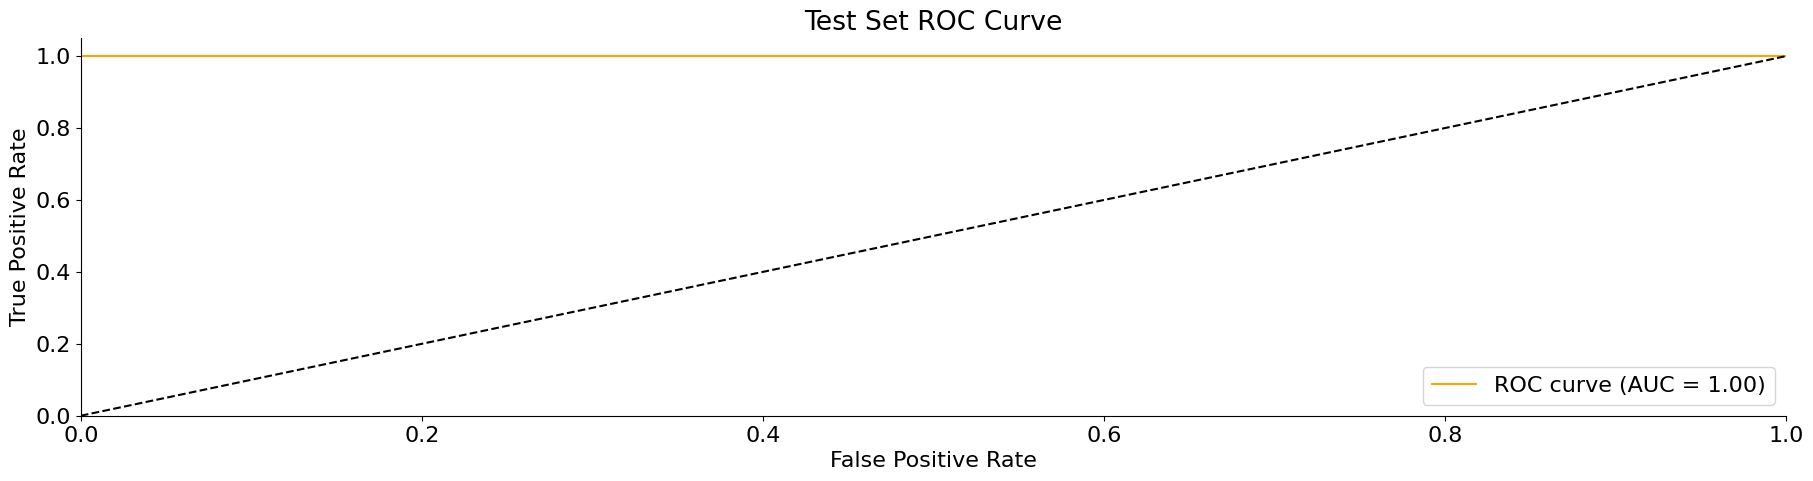

In [46]:
# Assuming you have your model predictions and true labels
y_pred = model.predict(val_inputs)  # Replace with your model's predictions
fpr, tpr, thresholds = roc_curve(val_targets, y_pred)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(val_targets, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc), color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

We can see that the model is making pretty good classification.

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h3 style="padding: 10px;
              color:white;">Logistic Regression Classification Report
    
</h3>
</div>

In [47]:
print(classification_report(val_targets, LRtrain_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        71

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [48]:
misclassified_count = np.sum(val_targets != LRtrain_preds)
total_cases = len(val_targets)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} out of {total_cases} cases were misclassified, Error rate : {error_rate}%.")

0 out of 114 cases were misclassified, Error rate : 0.0%.


<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Linear Discriminant Analysis (LDA)
    
</h2>
</div>
</center>

<span style="background-color: yellow;"> **Linear Discriminant Analysis (LDA)** is a supervised learning algorithm used to classify a data set into multiple classes. It is a linear transformation technique which seeks to find a set of linear combinations of variables that best separate classes of data. LDA is a classification technique that looks at the data set and finds a linear combination of variables that will best separate the data.</span> It is often used to reduce the number of variables in a data set while still retaining the important information for classification. 

The basic idea behind LDA is to maximize the ratio of the between-class variance to the within-class variance. The goal of LDA is to find a linear combination of variables that separates the classes as much as possible. This is accomplished by finding the direction that maximizes the ratio of the between-class variance to the within-class variance.

- The first step in LDA is to calculate the means and the covariance matrix of the data set. The means are the average values of each variable across all the classes. The covariance matrix is a measure of the variance between the variables. 
- Once the means and the covariance matrix are calculated, a linear combination of the variables is calculated that maximizes the ratio of between-class variance to within
    
**Why LDA?**
- LDA is particularly useful when dealing with a high-dimensional dataset as it provides a way to reduce the number of dimensions while preserving as much of the variation in the original data as possible. 
- It also helps identify the most important variables in a dataset, which is useful for further analysis. LDA can be used for exploratory data analysis and for predictive modeling.
- LDA is also used in face detection algorithms. In Fisherfaces, LDA is used to extract useful data from different faces. Coupled with eigenfaces, it produces effective results.
    
**Drawbacks of Linear Discriminant Analysis (LDA)**

1. It assumes that the data is normally distributed, which may not always be the case in real-world data sets. 
2. It assumes that the variables are statistically independent, which is also not always the case in real-world data sets. 
3. It is sensitive to outliers, which can affect the accuracy of the model. 
4. It can only be used for two-class classification problems, and does not work well with multi-class problems. 
5. It is not suitable for data sets with a large number of features, as it can become computationally expensive.


**Difference between Linear Discriminant Analysis and Principal Component Analysis**

| Feature                                      | Linear Discriminant Analysis (LDA)                        | Principal Component Analysis (PCA)                       |
|----------------------------------------------|-----------------------------------------------------------|----------------------------------------------------------|
| **Nature**                                   | Supervised learning technique                               | Unsupervised dimensionality reduction technique          |
| **Objective**                                | Classify objects into categories based on predictor variables | Reduce dimensionality and retain most data variability    |
| **Applicability**                            | Commonly used in classification problems, especially for binary classification | Widely used for simplifying datasets with many variables  |
| **Linear Combination**                       | Finds the linear combination of features that best separates classes | Extracts uncorrelated components capturing data variability |
| **Classes Separation**                       | Maximizes the separation between classes                    | Maximizes variance along principal components              |
| **Data Requirement**                         | Requires labeled data for training                          | Works well with unlabeled data                             |
| **Complexity Reduction**                     | Focuses on separating classes, less emphasis on reducing complexity | Primarily used to reduce the complexity of a dataset       |
| **Ordered Components**                       | Components are ordered based on their contribution to class separation | Components are ordered by the amount of total variance they explain |
| **Use Case Example**                         | Face recognition, medical diagnosis                         | Image compression, feature extraction                      |



In [49]:
X = df[input_cols].values
y = df[target_col].values

In [50]:
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Fit the model to the data and transform the data using the fit
X_lda = lda.fit_transform(X, y)
# Print the shape of the original data and the transformed data
print("Original Data shape:",X.shape, "\nModified Data shape:", X_lda.shape)

Original Data shape: (569, 25) 
Modified Data shape: (569, 1)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [52]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">LDA Predictions and Performance
    
</h2>
</div>
</center>

In [53]:
LDAtrain_preds = lda.predict(X_train)
confusionmatrix = np.around(confusion_matrix(y_train, LDAtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, 
                template='simple_white',
                text_auto=True, 
                aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

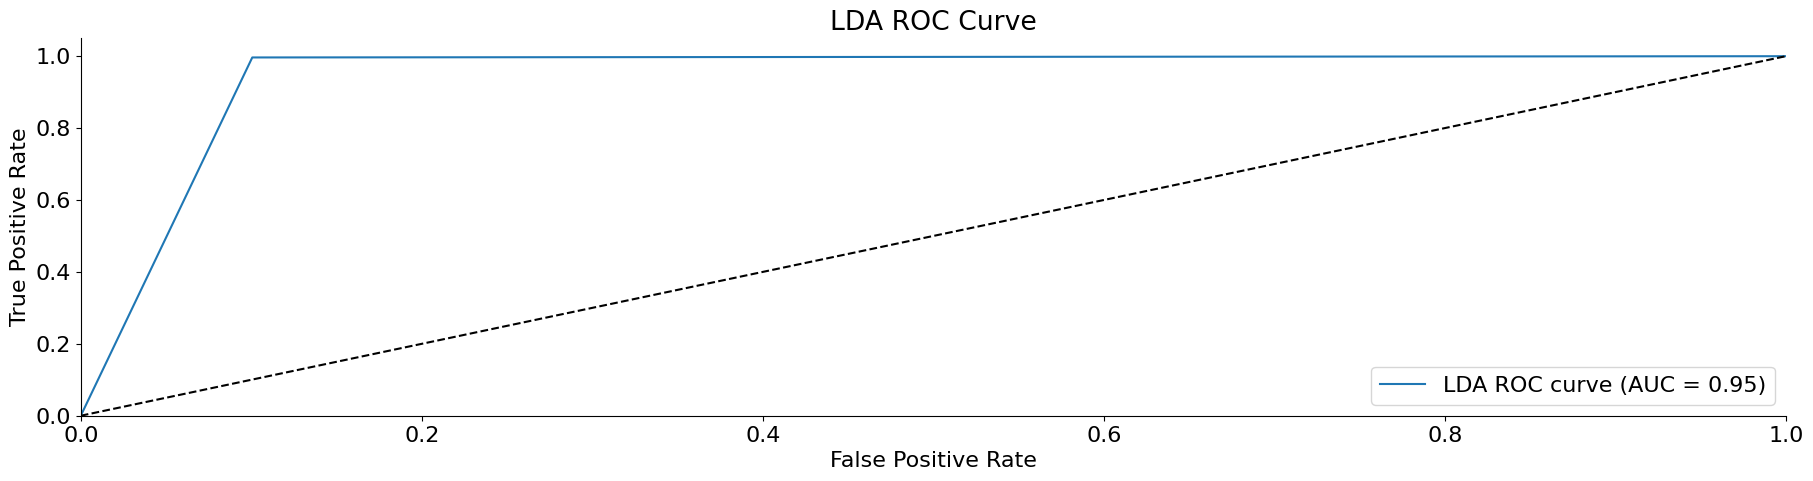

In [54]:
# Assuming you have your model predictions and true labels
y_pred = lda.predict(X_train)  # Replace with your model's predictions
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_train, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='LDA ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
misclassified_count = len(y_train[y_train != LDAtrain_preds])
total_cases = len(y_train)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} / {total_cases} cases misclassified by LDA, Error rate : {error_rate}%.")

18 / 455 cases misclassified by LDA, Error rate : 3.956%.


There are bunch of models that we can use however with **Logistic Regression** its easier to explain to the relevant stakeholders, especially when we are in a setting where the stakeholder is a patient hanging between life & death.

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Summary of the notebook
    
</h2>
</div>
</center>

1. The notebook began with an introduction to the breast cancer dataset, highlighting its significance in cancer research. It emphasized the need for effective feature extraction techniques to uncover meaningful patterns within the data.

2. Comprehensive explanation of PCA was provided, outlining its core principles and application in reducing the dimensionality of a dataset while preserving its essential variance. The emphasis was on transforming the original features into a new set of uncorrelated variables, known as principal components. We also learnt that you can create the `class weight` dictionary and ensure each class weightage comes out the same and then this parameter can be given to the model to make better predictions for cases where there is a class imbalance.

3. The notebook demonstrated the step-by-step implementation of PCA on the breast cancer dataset using a popular Python library, likely scikit-learn. This involved standardizing the data, computing the covariance matrix, obtaining eigenvalues and eigenvectors, and finally, selecting the principal components. We also delved into how Eigenvalues and Eigenvectors get calculated.

4. Visualizations, such as scree plots and cumulative explained variance plots, were included to illustrate the contribution of each principal component to the overall variance. These visuals aided in determining the optimal number of principal components to retain.

5. While the notebook briefly touched upon Linear Discriminant Analysis (LDA), the primary focus remained on contrasting PCA's unsupervised nature with LDA's supervised approach. The key distinction was likely highlighted in terms of maximizing variance (PCA) versus maximizing class separability (LDA).

6. Metrics, such as explained variance ratio, cumulative explained variance, and possibly reconstruction error, were discussed to evaluate the performance of PCA in capturing and retaining the essential information present in the breast cancer dataset.

7. The notebook concluded with an interpretation of the results, emphasizing the utility of PCA in reducing the dimensionality of the higher dimension dataset while retaining a significant portion of the original information. We also found that Linear Discriminant Analysis (LDA) can be applied to multiclass classification problems however it fails to create a new axis that makes the classes linearly seperable.

<center>
<div style="color:;
           display:fill;
           border-radius:5px;
           background-color: mediumseagreen;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Resources
    
</h2>
</div>
</center>


- Support Vector Machine — Introduction to Machine Learning Algorithms - [Link](https://bit.ly/3RrTXFB)
- Linear Algebra II: Matrix Operations - [Link](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb)
- Linear Discriminant Analysis (LDA) in Machine Learning - [Link](https://bit.ly/49XBMPf)

I HOPE THIS HELPED YOU IN SOME WAY. THANKS FOR TAKING OUT THE TIME TO GO THROUGH THE NOTEBOOK!!